In [3]:
%matplotlib inline
import sklearn
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import csv


def readData(fileName):

        with open(fileName,'rb') as csvTrainFile:
                fileReader = csv.reader(csvTrainFile)
                next(fileReader)
                X = []
                for row in fileReader:
                        X.append(row)
                return (np.array(X,dtype='float'))

X = readData('faithfulGeyserData.txt')            


def scaleData(X):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    X_minmax = min_max_scaler.fit_transform(X)
    return X_minmax
X = scaleData(X)

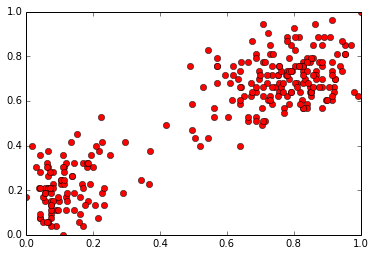

In [4]:
plt.plot(X[:,0],X[:,1],'ro')
plt.xlabel('')
plt.show()

In [5]:
X.shape

(272, 2)

In [37]:

def gaussianValue(X,mu, sigma):
    ans = []
    for x in X:
        ans.append((1/(sigma*2*np.pi ))*np.exp(-np.dot((x-mu),(x-mu))/sigma**2))
    return np.array(ans)

def runEMAlgorithm(mu1,mu2,sig1,sig2,pi,data):
    phi1 = gaussianValue(data,mu1,sig1)
    phi2 = gaussianValue(data,mu2,sig2)
    #E STEP
    resp = np.divide((pi*phi2),((1-pi)*phi1)+pi*(phi2))
    likelihood_old = 0
    count = 0
    likelihood_new = logLikelihood(resp,phi1,phi2)
    mu1Arr = []
    mu2Arr = []
    sig1Arr = []
    sig2Arr = []
    while(np.abs(likelihood_new - likelihood_old) >0.0001):
        #M STEP
        mu1 =  np.divide( np.dot((1-resp),data),np.sum(1-resp))
        mu2 = np.divide( np.dot((resp),data),np.sum(resp))
        sum1 = []
        sum2 = []
        for x in data:
            sum1.append(np.dot(x-mu1,x-mu1))
            sum2.append(np.dot(x-mu2,x-mu2))

        sig1 = np.sqrt(np.divide( np.dot((1-resp),sum1),np.sum(1-resp)))
        sig2 = np.sqrt(np.divide( np.dot((resp),sum2),np.sum(resp)))
       
        
        phi1 = gaussianValue(data,mu1,sig1)
        phi2 = gaussianValue(data,mu2,sig2)
        pi = np.mean(resp)
        #E STEP
        resp = np.divide((pi*phi2),((1-pi)*phi1)+pi*(phi2))
        likelihood_old = likelihood_new
        likelihood_new = logLikelihood(resp,phi1,phi2)
        count +=1
        mu1Arr.append(mu1)
        mu2Arr.append(mu2)
        sig1Arr.append(sig1)
        sig2Arr.append(sig2)

    #print count    
    return (np.array(mu1Arr),np.array(mu2Arr),np.array(sig1Arr),np.array(sig2Arr),resp,count)

def logLikelihood(pi,phi1,phi2):
    return np.sum(np.log((1-pi)*phi1 + pi*phi2))


def initializeAndExec():
#    mu1 = np.array([np.random.randint(1.5,5.5),np.random.randint(40,100)])
#    mu2 = np.array([np.random.randint(1.5,5.5),np.random.randint(40,100)])
    mu1 = np.array([np.random.random(),np.random.random()])
    mu2 = np.array([np.random.random(),np.random.random()])
    sig1 = np.random.random()*10
    sig2 = np.random.random()*10
    pi = np.random.random()
    return runEMAlgorithm(mu1,mu2,sig1,sig2,pi,X)

(mu1,mu2,sig1,sig2,resp,count) = initializeAndExec()

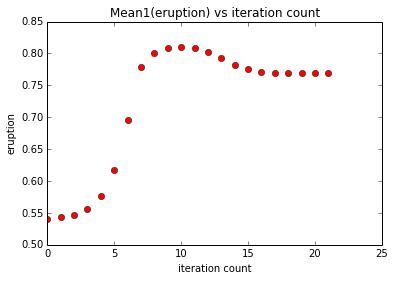

In [38]:
plt.title('Mean1(eruption) vs iteration count')
plt.ylabel('eruption')
plt.xlabel('iteration count')
plt.plot(np.arange(count),mu1[:,0],'ro')


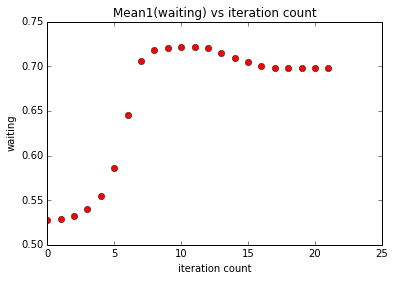

In [39]:
plt.title('Mean1(waiting) vs iteration count')
plt.ylabel('waiting')
plt.xlabel('iteration count')
plt.plot(np.arange(count),mu1[:,1],'ro')

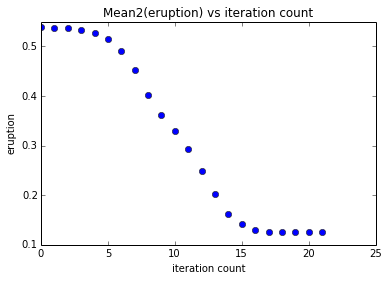

In [40]:
plt.title('Mean2(eruption) vs iteration count')
plt.ylabel('eruption')
plt.xlabel('iteration count')
plt.plot(np.arange(count),mu2[:,0],'bo')


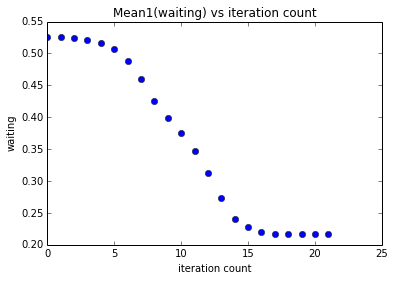

In [41]:
plt.title('Mean1(waiting) vs iteration count')
plt.ylabel('waiting')
plt.xlabel('iteration count')
plt.plot(np.arange(count),mu2[:,1],'bo')

In [42]:
import warnings
warnings.filterwarnings('error')
countArr = []
i=0
while(i<50):
    try:
        (mu1,mu2,sig1,sig2,resp,count) = initializeAndExec()
        i+=1
        countArr.append(count)
    except Warning:
        continue
        

In [ ]:
len(countArr)

(array([  2.,   4.,   1.,  14.,   3.,   9.,   6.,   3.,   1.,   0.,   3.,
          1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([  9. ,  10.6,  12.2,  13.8,  15.4,  17. ,  18.6,  20.2,  21.8,
         23.4,  25. ,  26.6,  28.2,  29.8,  31.4,  33. ,  34.6,  36.2,
         37.8,  39.4,  41. ]),
 <a list of 20 Patch objects>)

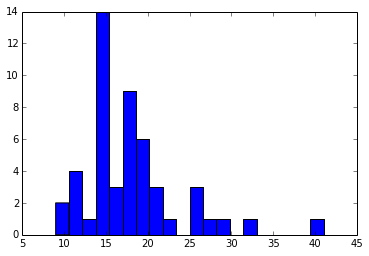

In [43]:
plt.hist(countArr,bins=20)

In [44]:
def kMeans(data,k):
    
    meanArr = np.array([[np.random.random(),np.random.random()] for i in range(k)],dtype=float)
    clusterNo = [0 for _ in range(len(data))]
    for t in range(30):
        for i,d in enumerate(data):
            clusterNo[i] = np.argmin(np.sum((d-meanArr)*(d-meanArr),axis=1))
        for c in range(k):
            meanArr[c] = np.mean([d for i,d in enumerate(data) if clusterNo[i]==c ],axis=0)
    return meanArr,clusterNo

In [45]:
meanArr,clusterNo=  kMeans(X,2)

In [46]:
meanArr

array([[ 0.12818076,  0.21967655],
       [ 0.77095402,  0.69908913]])

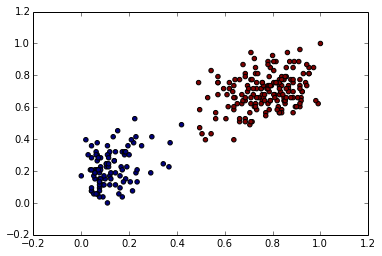

In [49]:
plt.scatter(X[:,0],X[:,1],c=clusterNo)
plt.show()


In [51]:
d1 = np.array([d for i,d in enumerate(X) if clusterNo[i]==0 ])
d2 = np.array([d for i,d in enumerate(X) if clusterNo[i]==1 ])

mu1 =  np.mean(d1,axis=0)
mu2 = np.mean(d2,axis=0)

sig1 = np.sqrt(np.mean(np.sum((d1-mu1)*(d1-mu1),axis=1),axis=0))
sig2 = np.sqrt(np.mean(np.sum((d2-mu2)*(d2-mu2),axis=1),axis=0))

#sig1 = np.sqrt(np.divide( np.dot((1-resp),sum1),np.sum(1-resp)))
#sig2 = np.sqrt(np.divide( np.dot((resp),sum2),np.sum(resp)))
       

In [ ]:
(d1-mu1)[0]*(d1-mu1)[0]

In [52]:
mu1

array([ 0.12818076,  0.21967655])

In [53]:
mu2

array([ 0.77095402,  0.69908913])

In [54]:
pi = np.random.random()
(mu1Arr,mu2Arr,sig1Arr,sig2Arr,resp,count) = runEMAlgorithm(mu1,mu2,sig1,sig2,pi,X)



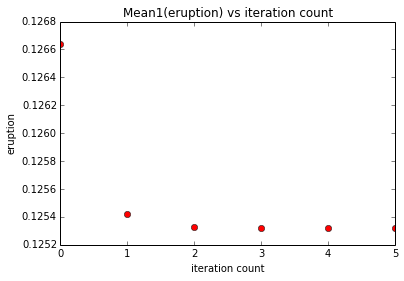

In [55]:
plt.title('Mean1(eruption) vs iteration count')
plt.ylabel('eruption')
plt.xlabel('iteration count')
plt.plot(np.arange(count),mu1Arr[:,0],'ro')

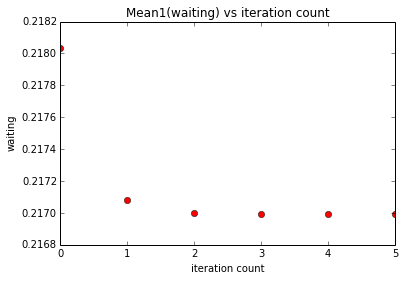

In [56]:
plt.title('Mean1(waiting) vs iteration count')
plt.ylabel('waiting')
plt.xlabel('iteration count')
plt.plot(np.arange(count),mu1Arr[:,1],'ro')

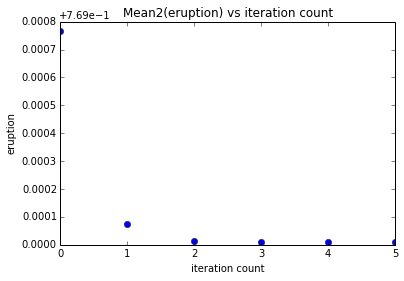

In [57]:
plt.title('Mean2(eruption) vs iteration count')
plt.ylabel('eruption')
plt.xlabel('iteration count')
plt.plot(np.arange(count),mu2Arr[:,0],'bo')

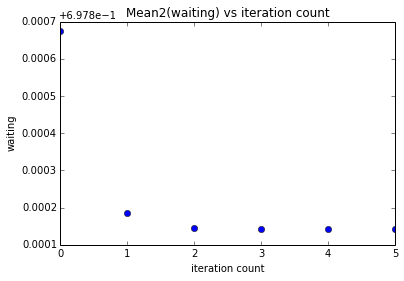

In [60]:
plt.title('Mean2(waiting) vs iteration count')
plt.ylabel('waiting')
plt.xlabel('iteration count')
plt.plot(np.arange(count),mu2Arr[:,1],'bo')

In [61]:
warnings.filterwarnings('error')
countArr2 = []
i=0
while(i<50):
    try:
        pi = np.random.random()
        (mu1Arr,mu2Arr,sig1Arr,sig2Arr,resp,count) = runEMAlgorithm(mu1,mu2,sig1,sig2,pi,X)
        i+=1
        countArr2.append(count)
    except Warning:
        continue
        

(array([  1.,   0.,   0.,   0.,   0.,   0.,  32.,   0.,   0.,   0.,   0.,
          0.,   0.,  16.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 4.  ,  4.15,  4.3 ,  4.45,  4.6 ,  4.75,  4.9 ,  5.05,  5.2 ,
         5.35,  5.5 ,  5.65,  5.8 ,  5.95,  6.1 ,  6.25,  6.4 ,  6.55,
         6.7 ,  6.85,  7.  ]),
 <a list of 20 Patch objects>)

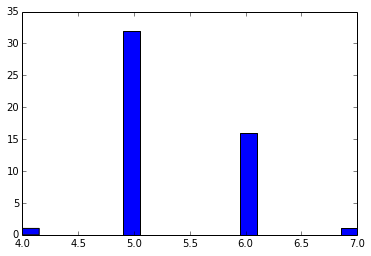

In [62]:
plt.hist(countArr2,bins=20)